<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter04/chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# !pip install imbalanced-learn==0.10.1

import warnings

warnings.filterwarnings('ignore')

# Plotting helper function

In [76]:
X = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv')
y = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv')
X_test = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv')
y_test = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv')

# Create dataset

In [77]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = X.drop(columns=['ID'])
X_test = X_test.drop(columns=['ID'])
imputer = SimpleImputer(strategy='mean')
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)
y = y.drop(columns=['ID'])
y_test = y_test.drop(columns=['ID'])
y = np.array(y['target'])
y_test = np.array(y_test['target'])
print(X.columns,y)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21'],
      dtype='object') [0 0 0 ... 0 0 0]


# Decision Tree (baseline)

Overall Results:
              Metric  Overall Score
0           Accuracy       0.967709
1          Precision       0.834950
2             Recall       0.819556
3           F1-Score       0.827181
4            AUC-ROC       0.903050
5  Balanced Accuracy       0.901345

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.981250  0.834950
1     Recall  0.983133  0.819556
2   F1-Score  0.982191  0.827181
3   F2-Score  0.982756  0.822589

Training time: 2.45 seconds
Inference time for 261712 samples: 29027.22 microseconds
Average inference time per sample: 0.11 microseconds


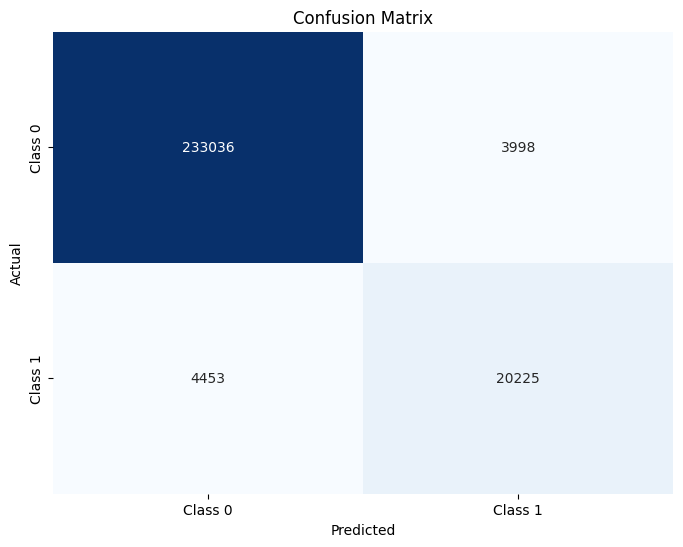

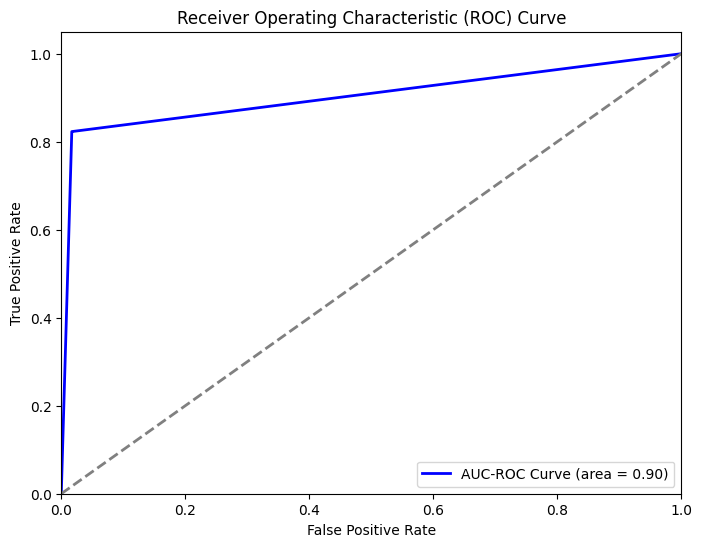

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X_train, y_train, X_test, and y_test are already defined

# Measure training time
start_train_time = time.time()
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
end_train_time = time.time()

training_time_seconds = end_train_time - start_train_time
training_time_microseconds = training_time_seconds * 1_000_000  # Convert to microseconds

# Measure inference time
start_inference_time = time.time()
y_pred = clf.predict(X_test)
end_inference_time = time.time()
inference_time_seconds = end_inference_time - start_inference_time
inference_time_microseconds = inference_time_seconds * 1_000_000  # Convert to microseconds

# Calculate probabilities for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Print the training and inference times in microseconds
print(f"\nTraining time: {training_time_seconds:.2f} seconds")
print(f"Inference time for {len(X_test)} samples: {inference_time_microseconds:.2f} microseconds")
print(f"Average inference time per sample: {inference_time_microseconds / len(X_test):.2f} microseconds")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


# Random Forest

Overall Results:
              Metric  Overall Score
0           Accuracy       0.977349
1          Precision       0.845329
2             Recall       0.929938
3           F1-Score       0.885617
4            AUC-ROC       0.994098
5  Balanced Accuracy       0.956111

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.992629  0.845329
1     Recall  0.982285  0.929938
2   F1-Score  0.987430  0.885617
3   F2-Score  0.984337  0.911688

Training time: 106.60 seconds
Inference time for 261712 samples: 2852246.76 microseconds
Average inference time per sample: 10.90 microseconds


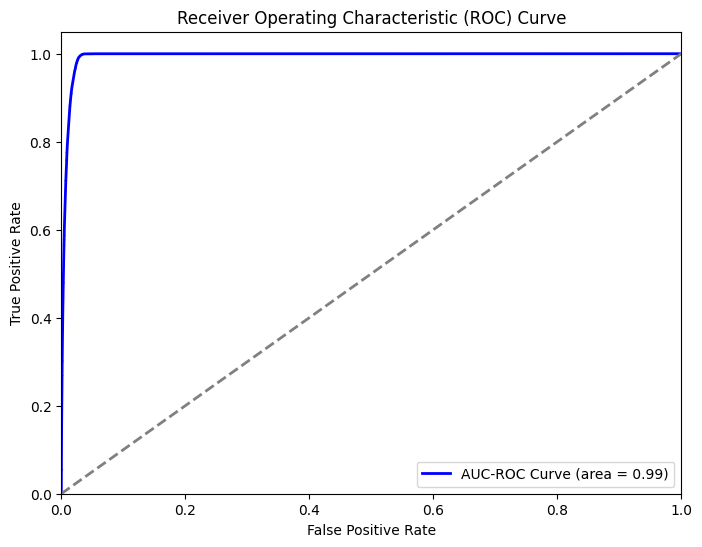

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined, and you have a separate X_test and y_test

# Measure training time
start_train_time = time.time()
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)
end_train_time = time.time()

training_time_seconds = end_train_time - start_train_time
training_time_microseconds = training_time_seconds * 1_000_000  # Convert to microseconds

# Measure inference time
start_inference_time = time.time()
y_pred = clf.predict(X_test)
end_inference_time = time.time()
inference_time_seconds = end_inference_time - start_inference_time
inference_time_microseconds = inference_time_seconds * 1_000_000  # Convert to microseconds

# Calculate probabilities for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Print the training and inference times in microseconds
print(f"\nTraining time: {training_time_seconds:.2f} seconds")
print(f"Inference time for {len(X_test)} samples: {inference_time_microseconds:.2f} microseconds")
print(f"Average inference time per sample: {inference_time_microseconds / len(X_test):.2f} microseconds")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


# Balanced Random Forest with undersampling

Overall Results:
              Metric  Overall Score
0           Accuracy       0.965367
1          Precision       0.829465
2             Recall       0.796458
3           F1-Score       0.812627
4            AUC-ROC       0.986135
5  Balanced Accuracy       0.889705

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.978896  0.829465
1     Recall  0.982952  0.796458
2   F1-Score  0.980920  0.812627
3   F2-Score  0.982138  0.802848

Training time: 20828240.39 microseconds
Inference time for 261712 samples: 2928932.19 microseconds
Average inference time per sample: 11.19 microseconds


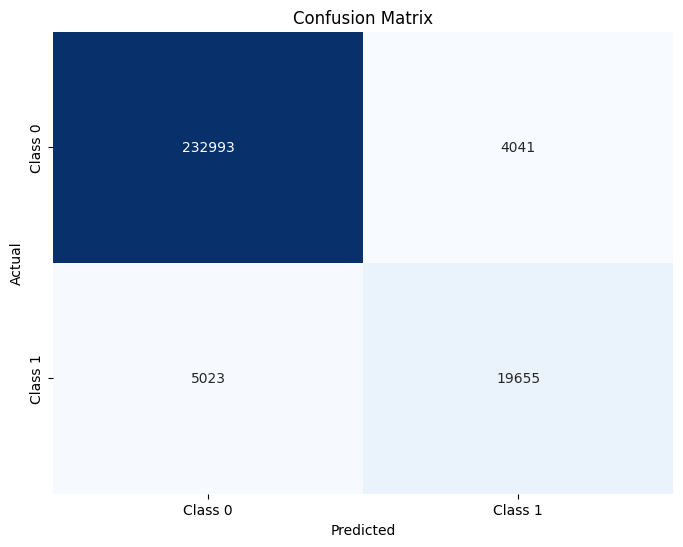


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    237034
           1       0.83      0.80      0.81     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.89      0.90    261712
weighted avg       0.96      0.97      0.97    261712



In [80]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    average_precision_score, classification_report
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import PrecisionRecallDisplay

# Assuming X_train, y_train, X_test, and y_test are already defined

# Measure training time
start_train_time = time.time()
balanced_RF_clf = BalancedRandomForestClassifier(
    sampling_strategy="auto",
    random_state=0,
    max_depth=6,
    max_features=1,
    min_samples_split=0.2,
    min_samples_leaf=10
)
balanced_RF_clf.fit(X_train, y_train)
end_train_time = time.time()

# Calculate training time in microseconds
training_time_microseconds = (end_train_time - start_train_time) * 1_000_000

# Measure inference time
start_inference_time = time.time()
y_pred = balanced_RF_clf.predict(X_test)
y_pred_proba = balanced_RF_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
end_inference_time = time.time()

# Calculate inference time in microseconds
inference_time_microseconds = (end_inference_time - start_inference_time) * 1_000_000  # Convert to microseconds

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Print the training and inference times in microseconds
print(f"\nTraining time: {training_time_microseconds:.2f} microseconds")
print(f"Inference time for {len(X_test)} samples: {inference_time_microseconds:.2f} microseconds")
print(f"Average inference time per sample: {inference_time_microseconds / len(X_test):.2f} microseconds")

# Plot the Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(balanced_RF_clf, X_test, y_test, ax=plt.gca(), name="BalancedRandomForestClassifier")
plt.title("Precision-Recall Curve")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Balanced RandomForest with SMOTE Oversampling

Overall Results:
              Metric  Overall Score
0           Accuracy       0.964159
1          Precision       0.777460
2             Recall       0.866527
3           F1-Score       0.819581
4            AUC-ROC       0.974952
5  Balanced Accuracy       0.920404

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.985994  0.777460
1     Recall  0.974282  0.866527
2   F1-Score  0.980103  0.819581
3   F2-Score  0.976602  0.847117


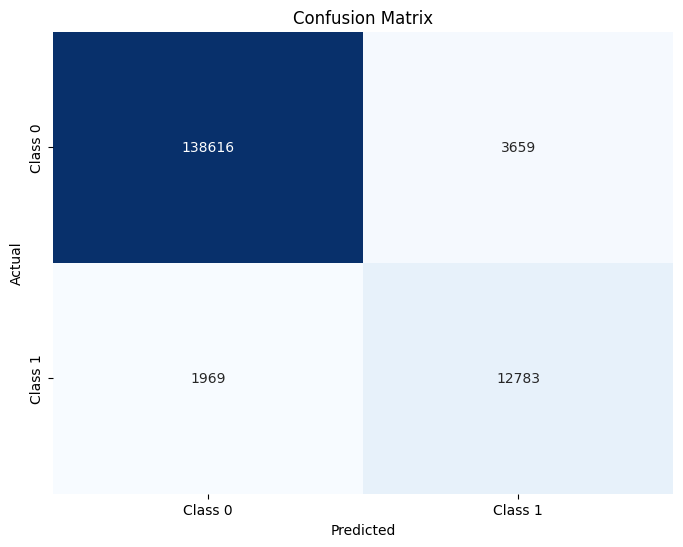

Training time: 140.012485 seconds
Inference time per sample: 11.31 microseconds


In [90]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    average_precision_score, classification_report
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE  # For oversampling

# Assuming X and y are already defined

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Measure training time
start_train_time = time.time()

# Initialize Balanced Random Forest Classifier
balanced_rf_clf = BalancedRandomForestClassifier(
    sampling_strategy="auto",
    random_state=42,
    max_depth=6,
    max_features=1,
    min_samples_split=0.2,
    min_samples_leaf=10
)

# Fit the model on the oversampled data
balanced_rf_clf.fit(X_resampled, y_resampled)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the original test set
y_pred = balanced_rf_clf.predict(X_test)
y_pred_proba = balanced_rf_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
PrecisionRecallDisplay.from_estimator(balanced_rf_clf, X_test, y_test, ax=plt.gca(), name="Balanced Random Forest")
plt.title("Precision-Recall Curve")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# BaggingClassifier

Overall Results:
              Metric  Overall Score
0           Accuracy       0.975301
1          Precision       0.846405
2             Recall       0.901694
3           F1-Score       0.873175
4            AUC-ROC       0.993427
5  Balanced Accuracy       0.942329

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.989695  0.846405
1     Recall  0.982964  0.901694
2   F1-Score  0.986318  0.873175
3   F2-Score  0.984303  0.890066


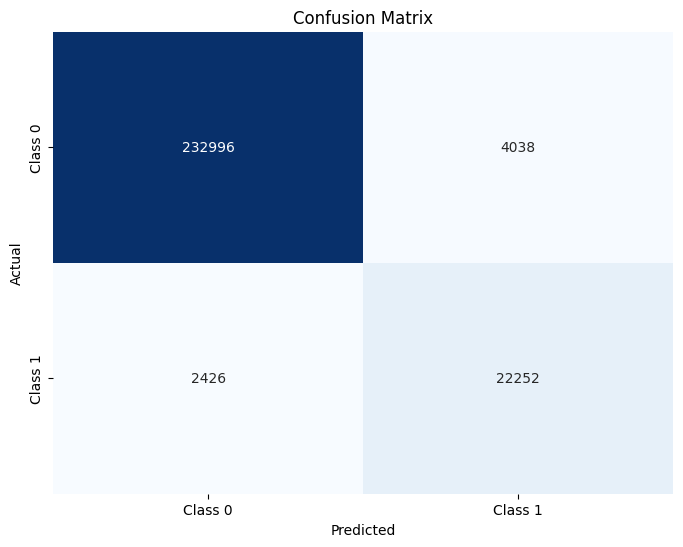

Training time: 106.046611 seconds
Inference time per sample: 30.82 microseconds


In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    average_precision_score, classification_report
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import PrecisionRecallDisplay

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize Bagging Classifier with a base Decision Tree Classifier
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Fit the model
bagging_clf.fit(X_train, y_train)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)
y_pred_proba = bagging_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
PrecisionRecallDisplay.from_estimator(bagging_clf, X_test, y_test, ax=plt.gca(), name="Bagging Classifier")
plt.title("Precision-Recall Curve")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# Underbagging via BalancedBaggingClassifier




Overall Results:
              Metric  Overall Score
0           Accuracy       0.973807
1          Precision       0.781977
2             Recall       1.000000
3           F1-Score       0.877651
4            AUC-ROC       0.999643
5  Balanced Accuracy       0.985546

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  1.000000  0.781977
1     Recall  0.971091  1.000000
2   F1-Score  0.985334  0.877651
3   F2-Score  0.976738  0.947183


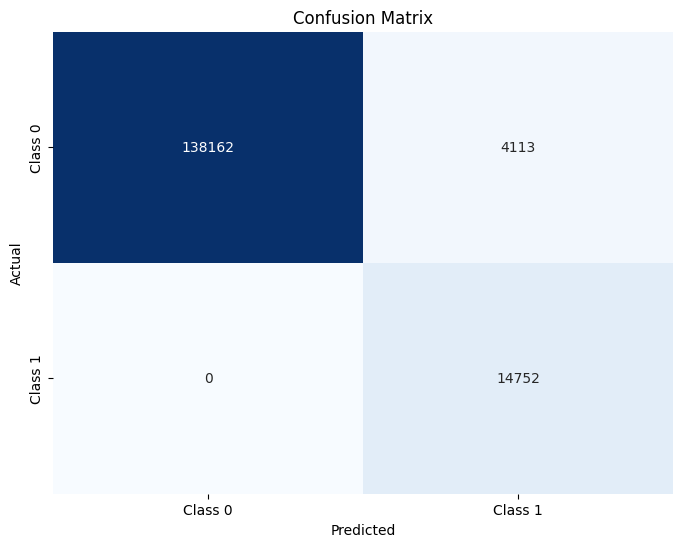

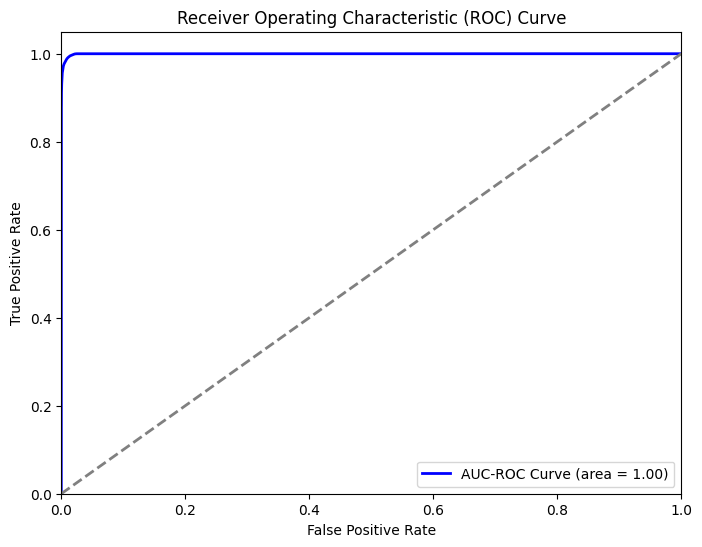

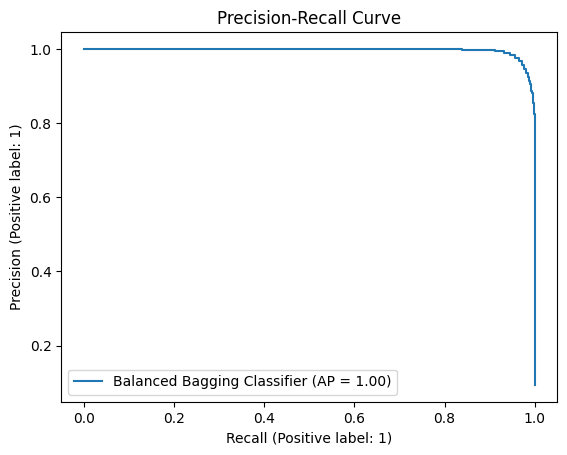

Training time: 134.808830 seconds
Inference time per sample: 29.62 microseconds


In [91]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    average_precision_score, classification_report
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import PrecisionRecallDisplay

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize Balanced Bagging Classifier with a base Decision Tree Classifier
underbagging_clf = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    sampling_strategy='auto',
    n_estimators=100,
    random_state=42
)

# Fit the model
underbagging_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = underbagging_clf.predict(X_test)
y_pred_proba = underbagging_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
PrecisionRecallDisplay.from_estimator(underbagging_clf, X_test, y_test, ax=plt.gca(), name="Balanced Bagging Classifier")
plt.title("Precision-Recall Curve")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# Overbagging via BalancedBaggingClassifier




In [83]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    average_precision_score, classification_report
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import PrecisionRecallDisplay

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize Balanced Bagging Classifier with a base Decision Tree Classifier
underbagging_clf = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    sampling_strategy='auto',
    n_estimators=100,
    random_state=42
)

# Fit the model
underbagging_clf.fit(X_train, y_train)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = underbagging_clf.predict(X_test)
y_pred_proba = underbagging_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
PrecisionRecallDisplay.from_estimator(underbagging_clf, X_test, y_test, ax=plt.gca(), name="Balanced Bagging Classifier")
plt.title("Precision-Recall Curve")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


Overall Results:
              Metric  Overall Score
0           Accuracy       0.971866
1          Precision       0.771949
2             Recall       0.995826
3           F1-Score       0.869711
4            AUC-ROC       0.993585
5  Balanced Accuracy       0.982599

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.999552  0.771949
1     Recall  0.969371  0.995826
2   F1-Score  0.984230  0.869711
3   F2-Score  0.975261  0.941232


Training time: 89.835993 seconds
Inference time per sample: 32.17 microseconds


# Performance Comparison of bagging classifiers

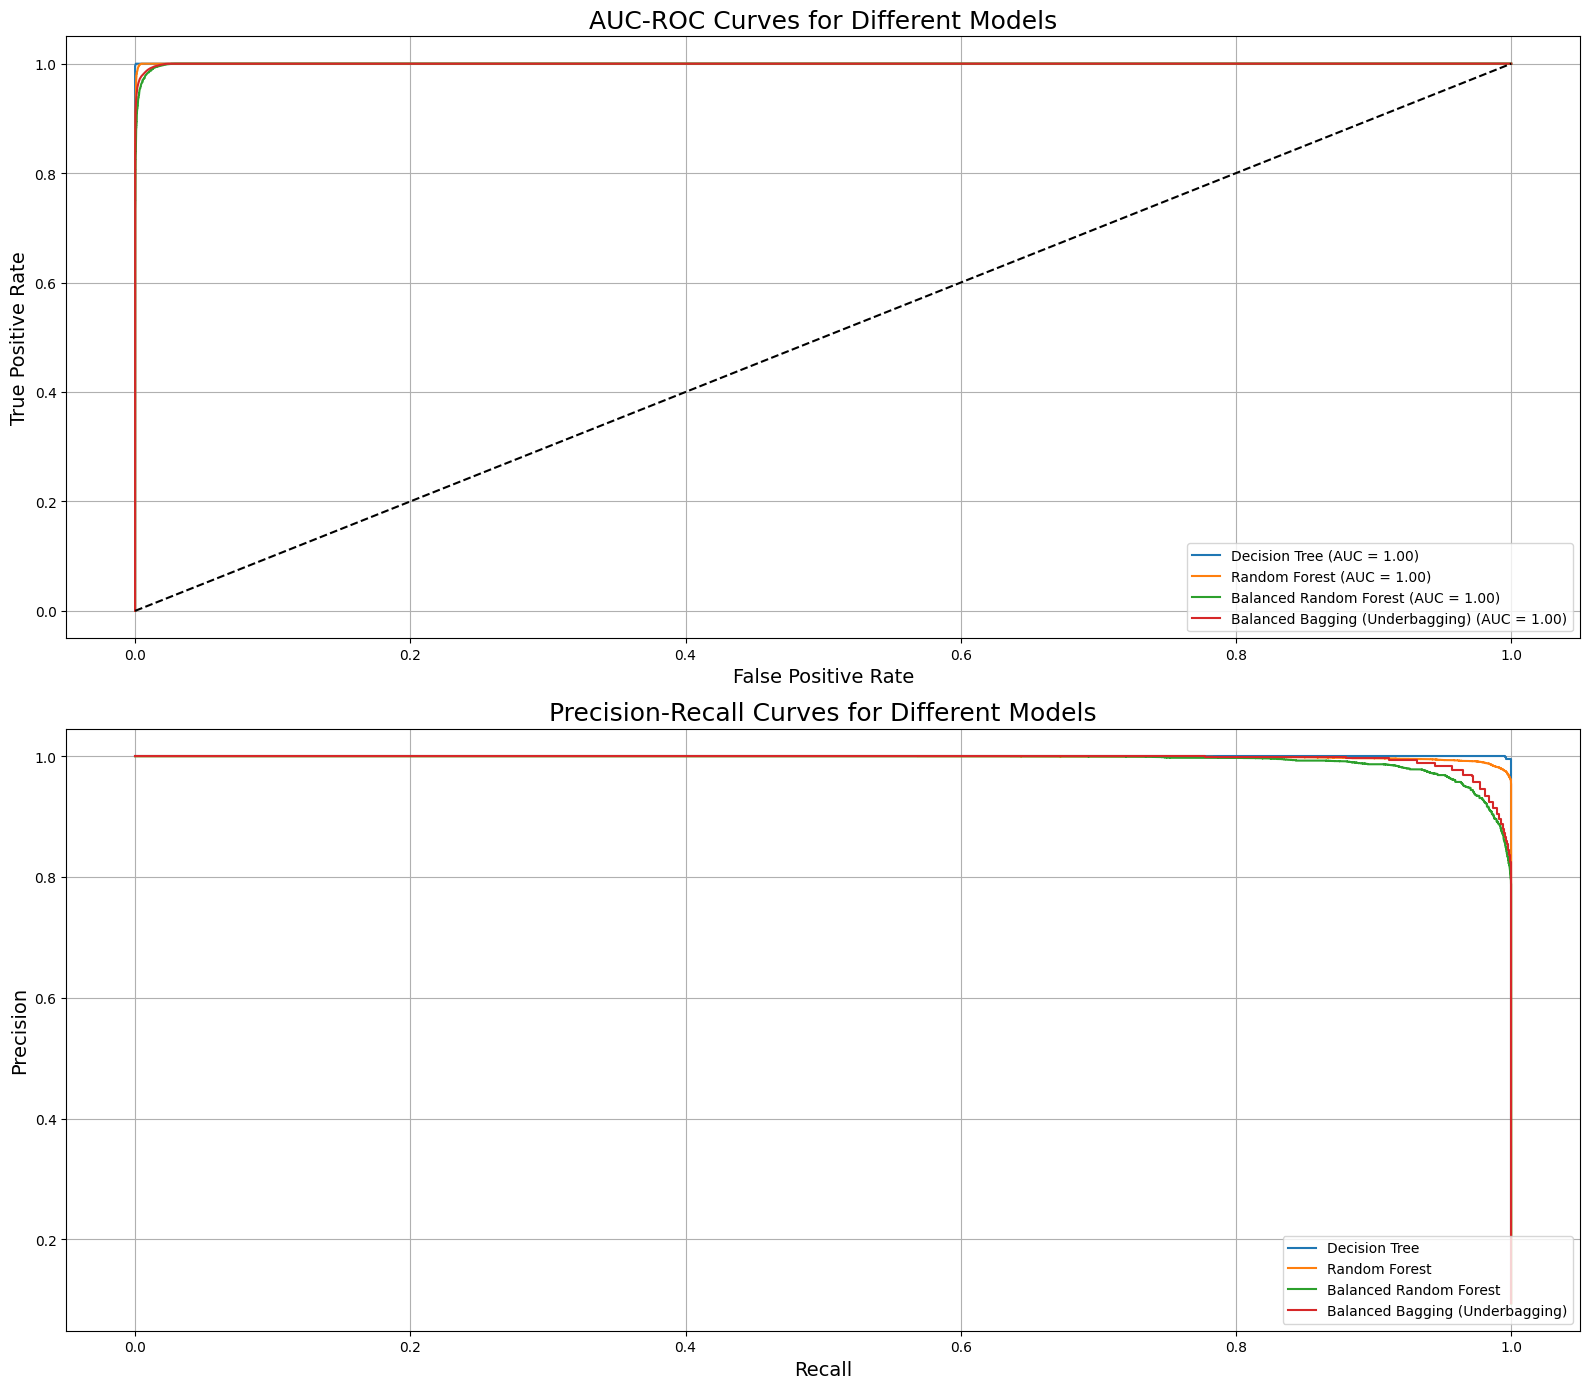

Results for Decision Tree:
  Accuracy: 0.9996
  Precision: 0.9988
  Recall: 0.9965
  F1 Score: 0.9976
  AUC-ROC: 1.0000
  Balanced Accuracy: 0.9982
  Training Time: 2.4044 seconds
  Inference Time per Sample: 0.26 microseconds


Results for Random Forest:
  Accuracy: 0.9973
  Precision: 0.9796
  Recall: 0.9924
  F1 Score: 0.9860
  AUC-ROC: 0.9999
  Balanced Accuracy: 0.9951
  Training Time: 110.7828 seconds
  Inference Time per Sample: 26.74 microseconds


Results for Balanced Random Forest:
  Accuracy: 0.9709
  Precision: 0.7635
  Recall: 1.0000
  F1 Score: 0.8659
  AUC-ROC: 0.9994
  Balanced Accuracy: 0.9839
  Training Time: 45.3945 seconds
  Inference Time per Sample: 21.76 microseconds


Results for Balanced Bagging (Underbagging):
  Accuracy: 0.9738
  Precision: 0.7820
  Recall: 1.0000
  F1 Score: 0.8777
  AUC-ROC: 0.9996
  Balanced Accuracy: 0.9855
  Training Time: 135.2307 seconds
  Inference Time per Sample: 29.66 microseconds




In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    average_precision_score, PrecisionRecallDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin, clone

# Assuming X and y are already defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom class to combine SMOTE with Bagging
class SMOTEBaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, n_estimators=10, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators_ = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Resample with SMOTE
            X_resampled, y_resampled = SMOTE(random_state=self.random_state).fit_resample(X, y)
            estimator = clone(self.base_estimator)
            estimator.fit(X_resampled, y_resampled)
            self.estimators_.append(estimator)
        return self

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators_])
        return np.round(np.mean(predictions, axis=0)).astype(int)

    def predict_proba(self, X):
        probabilities = np.array([estimator.predict_proba(X) for estimator in self.estimators_])
        return np.mean(probabilities, axis=0)

# Dictionary to hold model results
results = {}

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    start_train_time = time.time()
    model.fit(X, y)
    end_train_time = time.time()
    
    # Measure inference time
    start_inference_time = time.time()
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    end_inference_time = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "model": model,  # Store the model instance
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "balanced_acc": balanced_acc,
        "training_time": end_train_time - start_train_time,
        "inference_time_per_sample": (end_inference_time - start_inference_time) / len(X_test) * 1_000_000
    }

# 1. Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_clf, "Decision Tree")

# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rf_clf, "Random Forest")

# 3. Balanced Random Forest Classifier (Undersampling)
balanced_rf_clf = BalancedRandomForestClassifier(random_state=42)
train_and_evaluate_model(balanced_rf_clf, "Balanced Random Forest")

# 4. Balanced Bagging Classifier (Underbagging)
underbagging_clf = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
train_and_evaluate_model(underbagging_clf, "Balanced Bagging (Underbagging)")

# # 5. Balanced Bagging Classifier with Oversampling (SMOTE)
# smote_bagging_clf = SMOTEBaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
# train_and_evaluate_model(smote_bagging_clf, "SMOTEBagging (Oversampling)")

# Plot AUC-ROC and Precision-Recall curves
plt.figure(figsize=(16, 14))  # Increased figure size

# AUC-ROC Curves
plt.subplot(2, 1, 1)
for model_name, metrics in results.items():
    y_pred_proba = metrics["model"].predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random predictions
plt.title('AUC-ROC Curves for Different Models', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid()import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming X and y are defined
# Split the dataset
X_train = X
y_train = y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a DataFrame to hold the results
results = pd.DataFrame(columns=["Model", "AUC-ROC", "Average Precision"])

# Function to plot AUC-ROC and Precision-Recall curves
def plot_curves(models, model_names):
    plt.figure(figsize=(16, 14))

    # AUC-ROC curve
    plt.subplot(1, 2, 1)
    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('AUC-ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # Precision-Recall curve
    plt.subplot(1, 2, 2)
    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)
        plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.2f})')

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train and evaluate RUSClassifier
rus_clf = RUSBoostClassifier(random_state=42)
rus_clf.fit(X_train, y_train)
results = pd.concat([results, pd.DataFrame({
    "Model": ["RUSClassifier"],
    "AUC-ROC": [roc_auc_score(y_test, rus_clf.predict_proba(X_test)[:, 1])],
    "Average Precision": [average_precision_score(y_test, rus_clf.predict_proba(X_test)[:, 1])]
})], ignore_index=True)

# Train and evaluate Boosting Classifier (AdaBoost)
boosting_clf = AdaBoostClassifier(random_state=42)
boosting_clf.fit(X_train, y_train)
results = pd.concat([results, pd.DataFrame({
    "Model": ["Boosting Classifier (AdaBoost)"],
    "AUC-ROC": [roc_auc_score(y_test, boosting_clf.predict_proba(X_test)[:, 1])],
    "Average Precision": [average_precision_score(y_test, boosting_clf.predict_proba(X_test)[:, 1])]
})], ignore_index=True)

# Train and evaluate XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
results = pd.concat([results, pd.DataFrame({
    "Model": ["XGBoost"],
    "AUC-ROC": [roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])],
    "Average Precision": [average_precision_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])]
})], ignore_index=True)

# Train and evaluate Easy Ensemble
easy_ensemble_clf = EasyEnsembleClassifier(random_state=42)
easy_ensemble_clf.fit(X_train, y_train)
results = pd.concat([results, pd.DataFrame({
    "Model": ["Easy Ensemble"],
    "AUC-ROC": [roc_auc_score(y_test, easy_ensemble_clf.predict_proba(X_test)[:, 1])],
    "Average Precision": [average_precision_score(y_test, easy_ensemble_clf.predict_proba(X_test)[:, 1])]
})], ignore_index=True)

# Plot AUC-ROC and Precision-Recall curves for all models
plot_curves([rus_clf, boosting_clf, xgb_clf, easy_ensemble_clf],
            ["RUSClassifier", "Boosting Classifier", "XGBoost", "Easy Ensemble"])

# Display results
print(results)


# Precision-Recall Curves
plt.subplot(2, 1, 2)
for model_name, metrics in results.items():
    y_pred_proba = metrics["model"].predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, ax=plt.gca(), label=model_name)
plt.title('Precision-Recall Curves for Different Models', fontsize=18)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.show()

# Display overall results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1 Score: {metrics['f1']:.4f}")
    print(f"  AUC-ROC: {metrics['roc_auc']:.4f}")
    print(f"  Balanced Accuracy: {metrics['balanced_acc']:.4f}")
    print(f"  Training Time: {metrics['training_time']:.4f} seconds")
    print(f"  Inference Time per Sample: {metrics['inference_time_per_sample']:.2f} microseconds")
    print("\n")


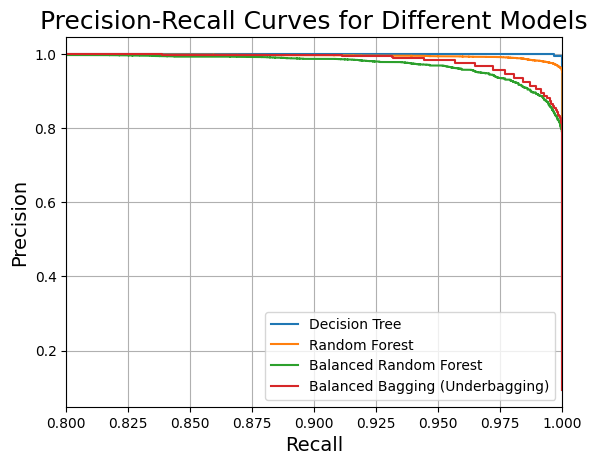

In [95]:
# plt.subplot(2, 1, 2)
for model_name, metrics in results.items():
    y_pred_proba = metrics["model"].predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, ax=plt.gca(), label=model_name)
plt.title('Precision-Recall Curves for Different Models', fontsize=18)
plt.xlim((0.8,1))
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc='lower right')
plt.grid()
